# Sales Analysis

#### Import necessary libraries

In [1]:
import os
import glob
import pandas as pd

#### Merge data from each month into one CSV

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if file.startswith("Sales")] # Ignore hidden files

#all_months_data = pd.DataFrame()
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(path+"/"+f) for f in files])

#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

#for file in files:
#    current_data = pd.read_csv(path+"/"+file)
#    all_months_data = pd.concat([all_months_data, current_data])
    
#all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("combined_csv.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [4]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add month column (alternative method)

In [8]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Add city column

In [9]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

########       First, you will call the .apply() method on the basebal_df dataframe.       #############
########       Then use the lambda function to iterate over the rows of the dataframe.     #############

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [11]:
Sales_months = all_data.groupby(['Month']).sum()
Sales_months

,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,10903,1811768.38,9709,1822256.73
2,13449,2188884.72,23950,2202022.42
3,17005,2791207.83,45459,2807100.38
4,20558,3367671.02,73116,3390670.24
5,18667,3135125.13,82830,3152606.75
6,15253,2562025.61,81324,2577802.26
7,16072,2632539.56,100051,2647775.76
8,13448,2230345.42,95688,2244467.88
9,13109,2084992.09,104589,2097560.13


In [12]:
Sales_months.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')


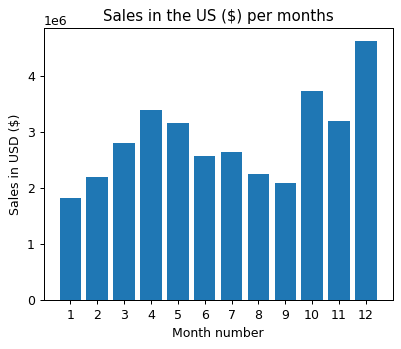

In [13]:
import matplotlib.pyplot as plt

months = Sales_months.index
print(months)

plt.figure(figsize=(5, 4), dpi = 90)

plt.bar(months,Sales_months['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Sales in the US ($) per months')
plt.show()



#### Question 2: What city sold the most product?

In [14]:
Sold_City = all_data.groupby(['City']).sum()
Sold_City

,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,104794,2795498.58
Austin (TX),11153,1809873.61,69829,69829,1819581.75
Boston (MA),22528,3637409.77,141112,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,208325,5452570.80
New York City (NY),27932,4635370.83,175741,175741,4664317.43
Portland (ME),2750,447189.25,17144,17144,449758.27
Portland (OR),11303,1860558.22,70621,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,315520,8262203.91


In [15]:
Sold_City.index

Index(['Atlanta  (GA)', 'Austin  (TX)', 'Boston  (MA)', 'Dallas  (TX)',
       'Los Angeles  (CA)', 'New York City  (NY)', 'Portland  (ME)',
       'Portland  (OR)', 'San Francisco  (CA)', 'Seattle  (WA)'],
      dtype='object', name='City')

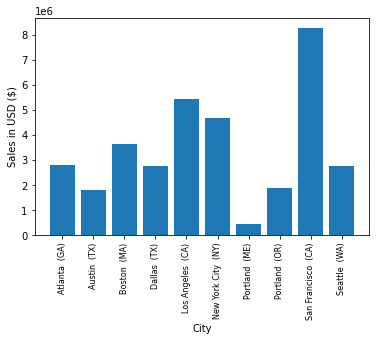

In [28]:
import matplotlib.pyplot as plt

keys = [city for city in Sold_City.index]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [17]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,9,27,1


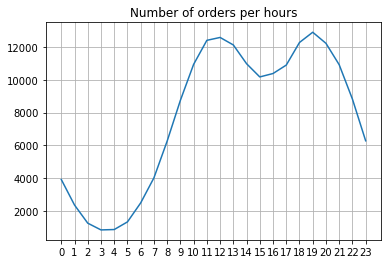

In [18]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.title('Number of orders per hours')
plt.show()


# My recommendation is slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

What two orders sold together have in comon ? They have the same Order ID, therefore we need to select the raws where at least an Order ID is issued to 2 or more products. 

- First create df, a Dataframe created with only the rows who match another row on the Order Id feature 
- Create the attribute 'Grouped', 

In [19]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\johan\anaconda3\envs\PyCharmLearningProject\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [20]:
df2


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [21]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [22]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [23]:
from tabulate import tabulate
print(tabulate(count.most_common(10),headers=['Products', 'Qty_Ordered']))

Products                                            Qty_Ordered
------------------------------------------------  -------------
('iPhone', 'Lightning Charging Cable')                     1005
('Google Phone', 'USB-C Charging Cable')                    987
('iPhone', 'Wired Headphones')                              447
('Google Phone', 'Wired Headphones')                        414
('Vareebadd Phone', 'USB-C Charging Cable')                 361
('iPhone', 'Apple Airpods Headphones')                      360
('Google Phone', 'Bose SoundSport Headphones')              220
('USB-C Charging Cable', 'Wired Headphones')                160
('Vareebadd Phone', 'Wired Headphones')                     143
('Lightning Charging Cable', 'Wired Headphones')             92


#### What product sold the most? Why do you think it sold the most?

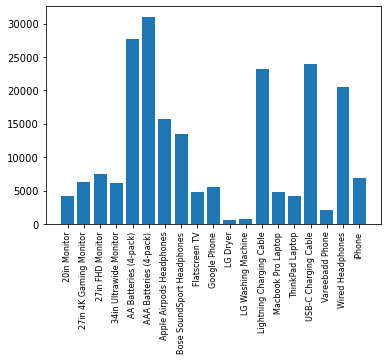

In [24]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\johan\AppData\Local\Temp/ipykernel_7756/136096346.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\johan\AppData\Local\Temp/ipykernel_7756/136096346.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


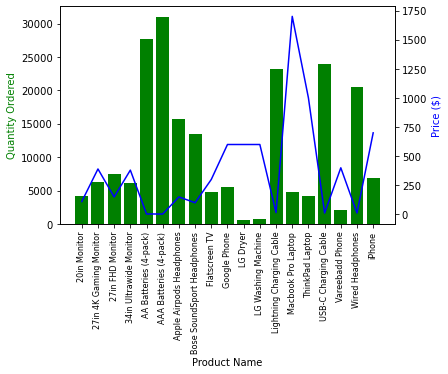

In [25]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

### Question for supply chain : 

Create a function, that for a certain item, describe his monthly quantity orderered : 

In [26]:
def distrib_qty_ordered() :
    # Ask the item name we want the distribution from :
    x = input('Enter an item name:')
    # Filter the Dataframe on the product
    filt = all_data['Product'] == x
    data = all_data.loc[filt]
    # Group by months
    data = data.groupby('Month')['Quantity Ordered'].agg(QTY_ORDERED='sum')
    #Plot the data : 
    keys = data.index
    quantity_ordered = data['QTY_ORDERED']

    plt.bar(keys, quantity_ordered)
    plt.xticks(keys, rotation='vertical', size=8)
    plt.xlabel("months")
    plt.ylabel('QTY_ORDERED')
    plt.title("Quantity of {} ordered per months".format(x))
    plt.show()


Enter an item name:20in Monitor


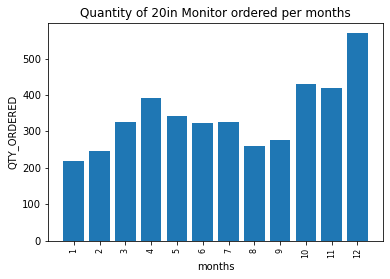

In [27]:
distrib_qty_ordered()